# 

In [5]:
import tensorflow
from tensorflow import keras
from tensorflow.keras.layers import Dense, Flatten
from tensorflow.keras import Sequential

In [6]:
##we have a buit in dataset called mnist in keras that contains handwritten images that w'll classify by building the appropriate model

(x_train, y_train ), (x_test, y_test)= keras.datasets.mnist.load_data()

In [7]:
x_train.shape   ## we have 60,000 images of 28X28 resolution

(60000, 28, 28)

In [8]:

y_train

array([5, 0, 4, ..., 5, 6, 8], dtype=uint8)

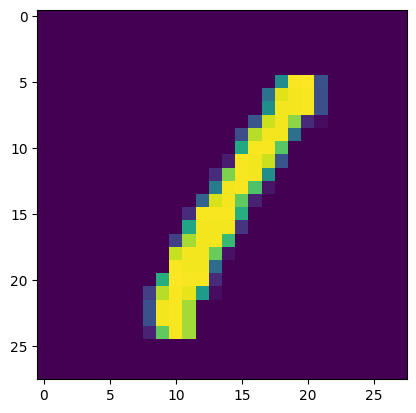

In [9]:
from matplotlib import pyplot as plt
plt.imshow(x_train[3])


In [10]:
##25X25=255
x_train = x_train/25
x_test = x_test/25

##converts all the value in the range of 0 to 1.

In [11]:
x_train[0]

array([[ 0.  ,  0.  ,  0.  ,  0.  ,  0.  ,  0.  ,  0.  ,  0.  ,  0.  ,
         0.  ,  0.  ,  0.  ,  0.  ,  0.  ,  0.  ,  0.  ,  0.  ,  0.  ,
         0.  ,  0.  ,  0.  ,  0.  ,  0.  ,  0.  ,  0.  ,  0.  ,  0.  ,
         0.  ],
       [ 0.  ,  0.  ,  0.  ,  0.  ,  0.  ,  0.  ,  0.  ,  0.  ,  0.  ,
         0.  ,  0.  ,  0.  ,  0.  ,  0.  ,  0.  ,  0.  ,  0.  ,  0.  ,
         0.  ,  0.  ,  0.  ,  0.  ,  0.  ,  0.  ,  0.  ,  0.  ,  0.  ,
         0.  ],
       [ 0.  ,  0.  ,  0.  ,  0.  ,  0.  ,  0.  ,  0.  ,  0.  ,  0.  ,
         0.  ,  0.  ,  0.  ,  0.  ,  0.  ,  0.  ,  0.  ,  0.  ,  0.  ,
         0.  ,  0.  ,  0.  ,  0.  ,  0.  ,  0.  ,  0.  ,  0.  ,  0.  ,
         0.  ],
       [ 0.  ,  0.  ,  0.  ,  0.  ,  0.  ,  0.  ,  0.  ,  0.  ,  0.  ,
         0.  ,  0.  ,  0.  ,  0.  ,  0.  ,  0.  ,  0.  ,  0.  ,  0.  ,
         0.  ,  0.  ,  0.  ,  0.  ,  0.  ,  0.  ,  0.  ,  0.  ,  0.  ,
         0.  ],
       [ 0.  ,  0.  ,  0.  ,  0.  ,  0.  ,  0.  ,  0.  ,  0.  ,  0.  ,
         0.  

In [12]:
x_test.shape

(10000, 28, 28)

In [13]:
y_test

array([7, 2, 1, ..., 4, 5, 6], dtype=uint8)

# now Building the neural network

In [14]:
model = Sequential()   #object

In [15]:
model.add(Flatten(input_shape = (28,28)))   ##convert the 2d data (28X28) into 1 d ie 128
model.add(Dense(128, activation = 'relu'))  ##input layer of 128
model.add(Dense(10, activation = 'softmax'))  ##output layer of 10 nodes since we have 10 multiple class (0-9), and softmax is best activation fun considered for multiple classes


In [16]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 784)               0         
                                                                 
 dense (Dense)               (None, 128)               100480    
                                                                 
 dense_1 (Dense)             (None, 10)                1290      
                                                                 
Total params: 101770 (397.54 KB)
Trainable params: 101770 (397.54 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


# compilation and training

In [17]:
model.compile(loss= 'sparse_categorical_crossentropy', optimizer ='Adam', metrics= ['accuracy'])

In [18]:
history = model.fit(x_train, y_train, epochs =10, validation_split=0.2)


Epoch 1/10


1500/1500 [==============================] - 4s 2ms/step - loss: 0.2798 - accuracy: 0.9201 - val_loss: 0.1455 - val_accuracy: 0.9570
Epoch 2/10
1500/1500 [==============================] - 2s 2ms/step - loss: 0.1203 - accuracy: 0.9639 - val_loss: 0.1337 - val_accuracy: 0.9607
Epoch 3/10
1500/1500 [==============================] - 2s 2ms/step - loss: 0.0867 - accuracy: 0.9733 - val_loss: 0.1247 - val_accuracy: 0.9657
Epoch 4/10
1500/1500 [==============================] - 3s 2ms/step - loss: 0.0693 - accuracy: 0.9785 - val_loss: 0.1224 - val_accuracy: 0.9683
Epoch 5/10
1500/1500 [==============================] - 3s 2ms/step - loss: 0.0592 - accuracy: 0.9814 - val_loss: 0.1336 - val_accuracy: 0.9685
Epoch 6/10
1500/1500 [==============================] - 2s 2ms/step - loss: 0.0515 - accuracy: 0.9834 - val_loss: 0.1243 - val_accuracy: 0.9703
Epoch 7/10
1500/1500 [==============================] - 2s 2ms/step - loss: 0.0413 - accuracy: 0.9868 - val_loss: 0.1335 - val_accurac

In [19]:
y_prbability = model.predict(x_test)

313/313 [==============================] - 0s 857us/step


In [20]:
y_prbability    

array([[3.07025276e-16, 3.49067927e-11, 6.45544798e-11, ...,
        9.99998927e-01, 9.64724072e-17, 1.52975760e-14],
       [1.17593452e-16, 9.45598038e-14, 1.00000000e+00, ...,
        3.17723401e-20, 5.60672515e-11, 1.16205621e-25],
       [1.40925717e-11, 9.99894261e-01, 8.85994887e-05, ...,
        1.38458672e-05, 3.26198756e-06, 4.42584771e-12],
       ...,
       [1.60072660e-25, 6.93810082e-20, 9.54164065e-21, ...,
        4.01633180e-08, 2.23347626e-13, 2.04129009e-07],
       [7.42814814e-21, 1.82387595e-22, 1.03035326e-26, ...,
        3.58611908e-20, 4.68531594e-12, 1.10618089e-24],
       [1.08145284e-13, 6.52354226e-27, 2.26380343e-13, ...,
        8.01454869e-27, 2.10669316e-18, 2.59173305e-17]], dtype=float32)

In [21]:
y_prediction = y_prbability.argmax(axis=1)

In [22]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test, y_prediction)     ##97% good accuracy alreadyy!!!

0.9753

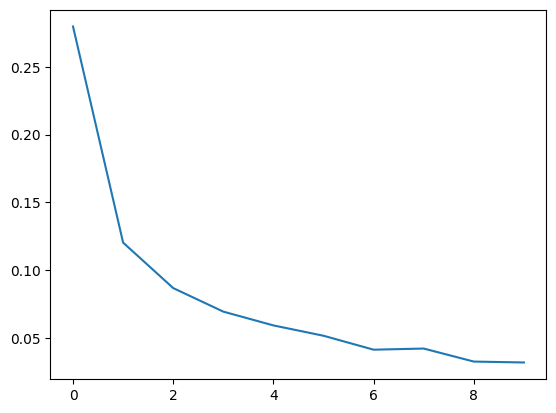

In [23]:
plt.plot(history.history['loss'])


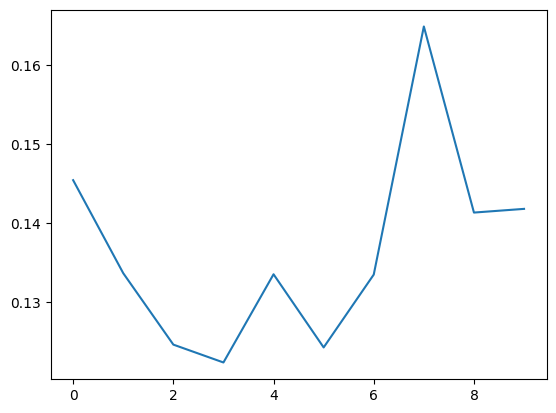

In [24]:
plt.plot(history.history['val_loss'])   #validation loss

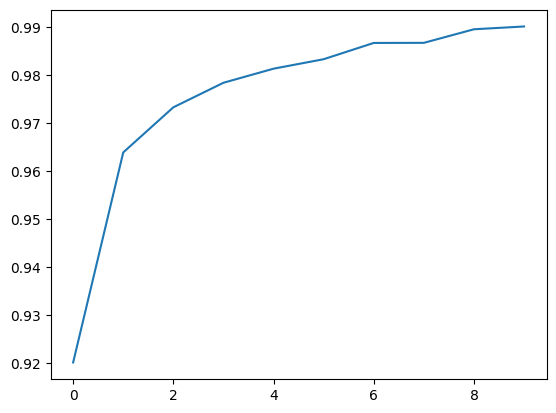

In [25]:
plt.plot(history.history['accuracy'])

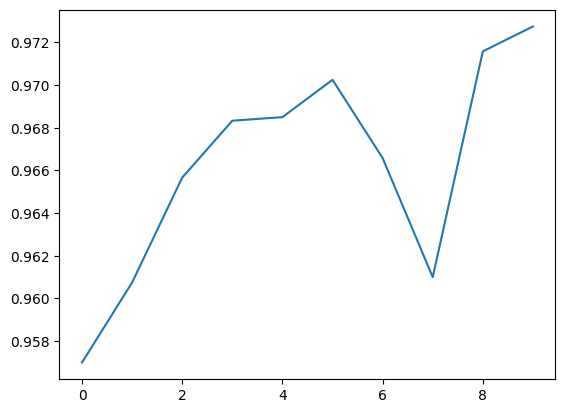

In [26]:
plt.plot(history.history['val_accuracy'])

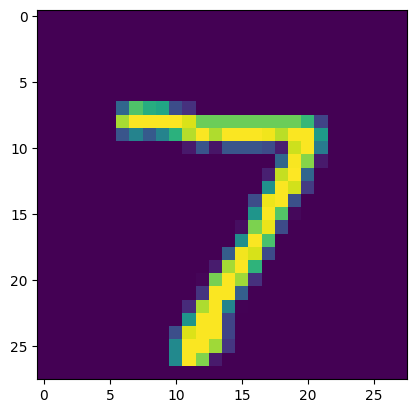

In [27]:
plt.imshow(x_test[0])

In [28]:
##lets test the model

model.predict(x_test[0].reshape(1,28,28)).argmax(axis=1)

1/1 [==============================] - 0s 22ms/step


array([7], dtype=int64)

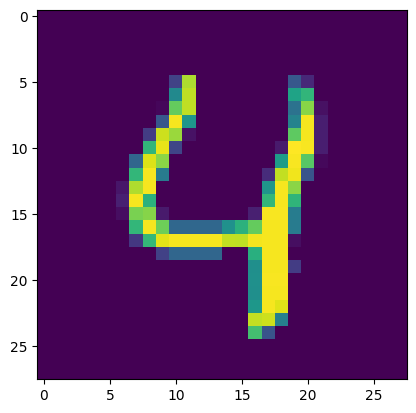

In [29]:
plt.imshow(x_test[4])

In [30]:

model.predict(x_test[4].reshape(1,28,28)).argmax(axis=1)

1/1 [==============================] - 0s 22ms/step


array([4], dtype=int64)

In [44]:
model.predict(x_test[345].reshape(1,28,28)).argmax(axis=1)

1/1 [==============================] - 0s 23ms/step


array([1], dtype=int64)

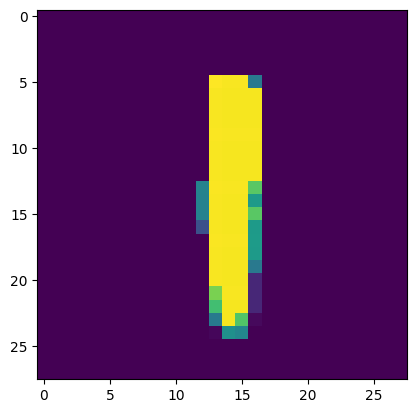

In [43]:
plt.imshow(x_test[345])